# Practical 3

### [Carl Henrik Ek](http://carlhenrik.com/), University of Cambridge

### [Radzim Sendyka](https://www.cst.cam.ac.uk/people/rs2071), University of Cambridge

### [Christian Cabrera](https://www.cst.cam.ac.uk/people/chc79), University of Cambridge

### 2024-11-18

The check Session for this Practical is 21 November 2024

Prerequisite: Practical 1, Practical 2

**Abstract:**

In this worksheet we will look at linear models. We will show a general framework for formulating models where the we have a set of response variables that we want to explain through a linear relation- ship from a set of explanatory variables. While many relationships are non-linear in nature it is often challenging to interpret and explain the results from non-linear models. Therefore, linear models remains very important as they provide a nice trade-off between explanation of the data while at the same time providing interpretable semantics.


# Generalised Linear Models

We have a set of explanatory variables $x \in X$ and a set of response variables $y \in Y$. The data is provided to us in pairs $D = \{x_i, y_i\}_N$ where $x_i$ and $y_i$ are in correspondence. Our aim is to build a model that allows us to predict the response variable $y_i$ from its corresponding explanatory variable $x_i$.

Linear regression makes the assumption that the relationship between the response variable and the explanatory variable can be written as a linear combination. Furthermore, it assumes that the observations of the response variable have been corrupted by an additive Gaussian noise process,

$$
y_i = \sum_{i=1}^{d} \beta_i x_{id} + E,
$$

where $E \sim \mathcal{N}(0, \sigma^2)$.

While both the explanatory and response variable are deterministic, due to the noise corrupting the observations, our predictions under the model are random. In order to extract a point estimate we therefore take the expected value,

$$
\mathbb{E}[y_i | x_i] = \mathbb{E} \left( \sum_{i=1}^{d} \beta_i x_{id} + E \right)
$$

$$
= \sum_{i=1}^{d} \beta_i x_{id} + \mathbb{E}[E]
$$

$$
= \sum_{i=1}^{d} \beta_i x_{id} + 0.
$$


Traditionally the linear regression model above is motivated by an additive noise assumption that corrupts the observed response. An equivalent explanation is to absorb the noise directly into the response variable and consider it a linear model of a
normal distributed response,

$$
y_i = \sum_{i=1}^{d} \beta_i x_{id} + \varepsilon,
$$

$$
y_i + \varepsilon = \sum_{i=1}^{d} \beta_i x_{id},
$$

$$
\hat{y}_i = \sum_{i=1}^{d} \beta_i x_{id},
$$

$$
\hat{y}_i \sim \mathcal{N} \left( y_i, \sigma^2 \right) = \mathcal{N} \left( \sum_{i=1}^{d} \beta_i x_{id}, \sigma^2 \right),
$$

where, as we previously derived, the linear predictor directly parametrises the mean or the first moment of
the random response variable.

If we want to generalise the setting, we can think of scenarios where the response variable follows a different distribution. This could be a Bernoulli distributed response, as in binary classification, or Poisson distributed if we are describing discrete events. Specifically, we will look at models where the first moment of the response variable can be parametrised as a function of a linear combination of the explanatory variables,

$$
g(\mathbb{E}[y_i | x_i]) = \sum_{i=1}^{d} \beta_i x_{id},
$$

where the function $g(\cdot)$ is known as a link function, connecting the expected value and the linear predictor (for the linear regression case above the link function is the identity).

While the above formulation is the one that is most commonly used in the statistics literature, in a machine learning setting we can think of a transformation of a linear mapping as

$$
\mathbb{E}[y_i | x_i] = g^{-1} \left( \sum_{i=1}^{d} \beta_i x_{id} \right),
$$

If you are familiar with simple compositional function models, such as neural networks, you can see how these are recursive formulations of similar structures. An article that describes neural networks in the light of the models we will describe can be found [here](https://towardsdatascience.com/glms-part-iii-deep-neural-networks-as-recursive-generalized-linear-URL).


The class of models that can be described using the equations above are commonly referred to as Generalised Linear Models (GLM) (McCullagh et al., 1989), where the generalisation comes from the fact that we consider the response variable to follow an Exponential Dispersion Family distribution ([wiki](https://en.wikipedia.org/wiki/Exponential_dispersion_model)). This family is a rich class of probability distributions that contains most of the distributions you may be familiar with. Each distribution is defined through two parameters: the location parameter and a scale parameter. The link function plays the role of "linking" the value of the linear predictor to the location parameter of the distribution.

Many classical statistical models can be written in the language of generalised linear models. Below, a list of models that fall into this category is shown ([source](https://online.stat.psu.edu/stat504/lesson/6/6.1)). Each model is characterised by three different components: an exponential dispersion family distribution of the response, a link function, and a linear predictor from the explanatory variables.

<div align="center">

| Model                | Response Variable | Link              | Explanatory Variable |
|----------------------|-------------------|-------------------|-----------------------|
| Linear Regression    | Normal           | Identity          | Continuous            |
| Logistic Regression  | Binomial         | Logit             | Mixed                 |
| Poisson Regression   | Poisson          | Log               | Mixed                 |
| ANOVA                | Normal           | Identity          | Categorical           |
| ANCOVA               | Normal           | Identity          | Mixed                 |
| Loglinear            | Poisson          | Log               | Categorical           |
| Multinomial Response | Multinomial      | Generalized Logit | Mixed                 |


The exponential dispersion family can be written in the following canonical form,

$$
f(y; \theta, \phi) = \exp \left( \frac{\theta y - b(\theta)}{a(\phi)} + c(y, \phi) \right),
$$

where $\theta$ is the location and $\phi$ the scale parameter, respectively. A special instantiation of this is the Gaussian distribution,

$$
f(y; \mu, \sigma^2) = \exp \left( \frac{\mu y - \frac{1}{2} \mu^2}{\sigma^2} - \frac{y^2}{2\sigma^2} - \frac{1}{2} \ln(2\pi\sigma^2) \right),
$$

where we can identify,

$$
\theta = \mu
$$

$$
\phi = \sigma^2
$$

$$
b(\theta) = \frac{1}{2} \theta^2
$$

$$
a(\phi) = \phi
$$

$$
c(y, \phi) = \frac{y^2}{2\phi} - \frac{1}{2} \ln(2\pi\phi)
$$

The benefit of writing the distribution in this general form is that we can easily derive a general expression for both the first and the second moments of the predictive distribution,

$$
\mathbb{E}[y | x] = \frac{\partial}{\partial \theta} b(\theta)
$$

$$
\mathbb{V}[y | x] = a(\phi) \frac{\partial^2}{\partial \theta^2} b(\theta).
$$

This means that given a GLM, we can compute predictions and our uncertainty about those predictions in closed form. We will now proceed to look at how we can fit these models to data and learn the parameters $\beta$ that connect the explanatory variables with the response.


# Learning Generalised Linear Models

Fitting the GLM models described above to data implies learning the parameters $\beta$ of the linear predictor. We will do so by finding the maximum likelihood estimate. By specifying the distribution of the response variable, we have in effect specified a likelihood of each individual data-point. To reach the joint likelihood of each response variable, we will make the assumption that each observed response is conditionally independent given the parameters and the explanatory variables. This leads to the following objective function,

$$
\hat{\beta} = \arg \max_{\beta} \prod_{i=1}^{N} p(y_i | x_i, \beta).
$$

GLM models are very well studied in the literature, and many different highly efficient approaches exist for fitting the parameters to data. While this is an interesting topic in itself, it is beyond the scope of this course. Instead, we will put our trust in the very well-documented library [Statsmodels](https://www.statsmodels.org) rather than implementing this ourselves.

Below, the code for implementing two separate GLM models is shown. The data is count data, and the most suitable model would be a Poisson regression model for this type. In addition, we also include a standard Gaussian linear model with a single parameter parametrising the slope of the line.

The output figure will show the output of fitting a Poisson regression model in red and the Gaussian model in cyan. The dotted lines shows the 95% confidence interval for the **parameters** of the fit. We should see the fit is (not surprisingly) much worse for the Gaussian model compared to the Poisson.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

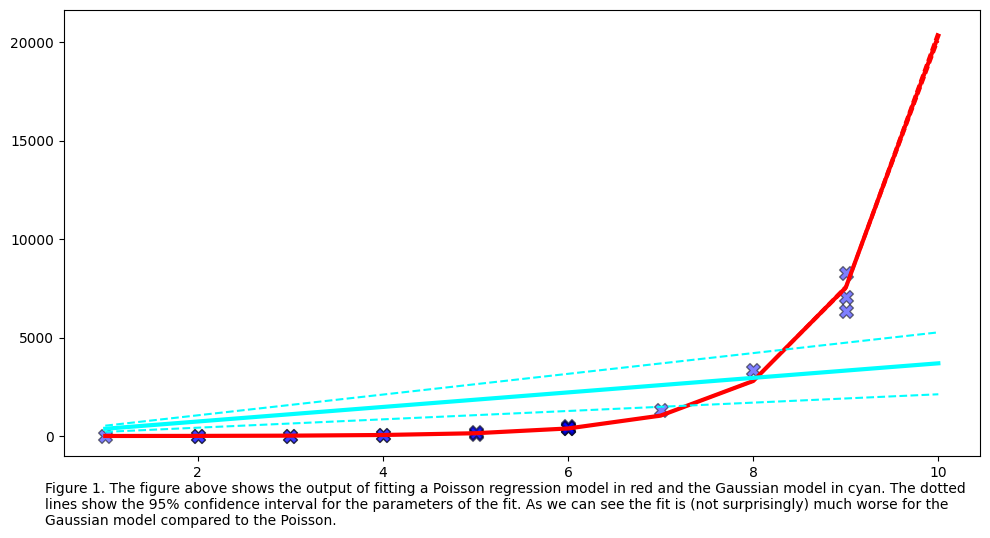

In [2]:
# generate data
x = np.array([[i] for i in np.random.choice(range(1,10), 20)])
y = np.array([np.exp(i) + np.random.normal(0,0.25*np.exp(i),1)[0] for i in x])

# make sure that the values are positive
y[y<0] = 0

# create models
m_poisson = sm.GLM(y,x, family=sm.families.Poisson())
m_poisson_results = m_poisson.fit()

m_gaussian = sm.GLM(y,x, family=sm.families.Gaussian())
m_gaussian_results = m_gaussian.fit()

# prediction
x_pred = np.arange(1,11).reshape(-1,1)
y_pred = m_poisson_results.get_prediction(x_pred).summary_frame(alpha=0.05)

y_pred_gaussian = m_gaussian_results.get_prediction(x_pred).summary_frame(alpha=0.05)

# plot results
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

plt.scatter(x,y,marker='X',color='blue',edgecolor='black',s=100,alpha=0.5,zorder=1)

plt.plot(x_pred,y_pred['mean'],color='red',linewidth=3.0,zorder=2)
plt.plot(x_pred,y_pred['mean_ci_lower'], color='red',linestyle='--',zorder=2)
plt.plot(x_pred,y_pred['mean_ci_upper'], color='red',linestyle='--',zorder=2)

plt.plot(x_pred,y_pred_gaussian['mean'],color='cyan',linewidth=3.0,zorder=2)
plt.plot(x_pred,y_pred_gaussian['mean_ci_lower'], color='cyan',linestyle='--',zorder=2)
plt.plot(x_pred,y_pred_gaussian['mean_ci_upper'], color='cyan',linestyle='--',zorder=2)

fig.text(.05, -.06, "Figure 1. The figure above shows the output of fitting a Poisson regression model in red and the Gaussian model in cyan. The dotted\nlines show the 95% confidence interval for the parameters of the fit. As we can see the fit is (not surprisingly) much worse for the\nGaussian model compared to the Poisson.")

plt.tight_layout()

The important part of the code above is the `m_poisson = sm.GLM(y,x, family=sm.families.Poisson())` call where we specify the distribution of the of the response variable. Statsmodels currently implements the following distributions, Binomial, Gamma, Gaussian, InverseGaussian, NegativeBinomial, Poisson, Tweedie which should give you a rich playground of models to work with.

# Basis-function Models

In the framework we have described above, the linear prediction is directly on the explanatory variables. However, we can generalise this slightly if we instead want to perform the regression over a set of basis functions. In statistics, we often refer to the matrix of the explanatory variables as the design matrix of the data. We can easily "design" a matrix that maps the explanatory variables to a "feature space" and then perform the regression over this domain instead.

In Figure 1, the cyan plot uses only a single parameter in its prediction and is therefore only able to parametrise lines that intersect at $(0, 0)$. In order to also parametrise the intersection of the line in the model, we require an expansion of the input domain with a constant one, as follows:

$$
X =
\begin{bmatrix}
x_0 & 1 \\
x_1 & 1 \\
\vdots & \vdots \\
x_N & 1 \\
\end{bmatrix}
$$

Using the above as the explanatory variables, we will be able to fit both the intersection and the slope. However, we can take this concept further and generalise this to perform regression over a different expanded explanatory space. Say that we know that the relationship between the response and the explanatory variables is:

$$
y = \beta_0 \sin(x) + \beta_1 \sin\left(\frac{x^2}{40}\right) + \beta_2 x.
$$

We can now create a new design matrix that includes all the functions we need and apply the GLM framework as before:

$$
\begin{bmatrix}
\sin(x_0) & \sin\left(\frac{x_0^2}{40}\right) & x_0 \\
\sin(x_1) & \sin\left(\frac{x_1^2}{40}\right) & x_1 \\
\vdots & \vdots & \vdots \\
\sin(x_N) & \sin\left(\frac{x_N^2}{40}\right) & x_N \\
\end{bmatrix}
$$


Below we will implement this using the `OLS` model which is just a Gaussian response and an identity link function. The motivation for using `OLS` rather than `GLM` is that the former provides easier means of analysing
predictions.

The resulting figure shows fitting a linear Gaussian model to a non-linear function. The prediction in red shows the model where the design matrix is directly on the explanatory variables while the cyan uses a design matrix of non-linear functions.

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

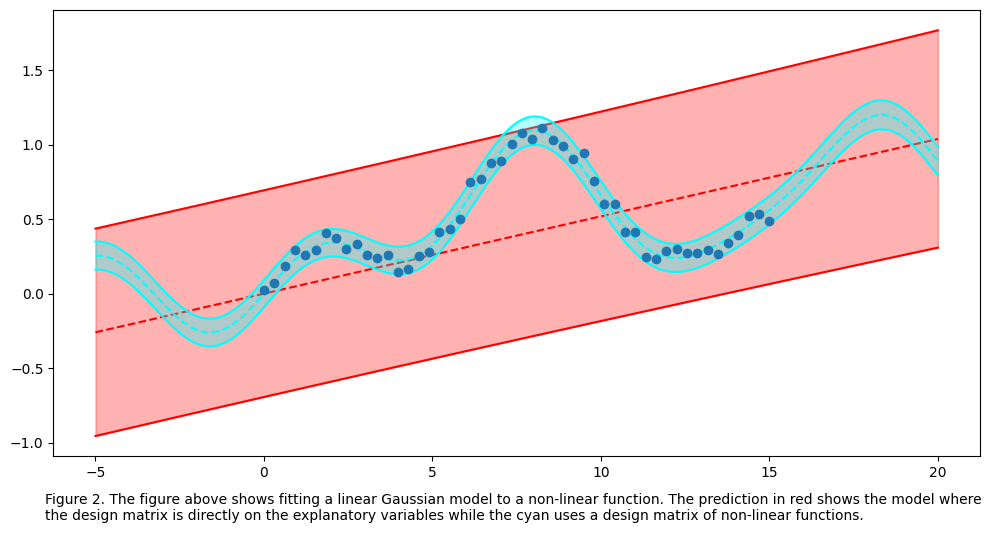

In [4]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Fit a simple linear model
m_linear = sm.OLS(y, x)
results = m_linear.fit()

# Design matrix with basis functions
design = np.concatenate((np.sin(x).reshape(-1, 1), np.sin(x**2 / 40).reshape(-1, 1), x.reshape(-1, 1)), axis=1)
m_linear_basis = sm.OLS(y, design)
results_basis = m_linear_basis.fit()

# Predictions
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
design_pred = np.concatenate((np.sin(x_pred), np.sin(x_pred**2 / 40), x_pred), axis=1)

y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

# Plotting
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

# Linear model predictions
ax.plot(x_pred, y_pred_linear['mean'], color='red', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_lower'], color='red', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_upper'], color='red', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear['obs_ci_lower'], y_pred_linear['obs_ci_upper'], color='red', alpha=0.3, zorder=1)

# Basis model predictions
ax.plot(x_pred, y_pred_linear_basis['mean'], color='cyan', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'], color='cyan', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'], color='cyan', alpha=0.3, zorder=1)

fig.text(.05, -.05, "Figure 2. The figure above shows fitting a linear Gaussian model to a non-linear function. The prediction in red shows the model where\nthe design matrix is directly on the explanatory variables while the cyan uses a design matrix of non-linear functions.")

plt.tight_layout()
plt.show()


The figure above shows fitting a linear Gaussian model to a non-linear function. The prediction
in red shows the model where the design matrix is directly on the explanatory variables while the cyan uses
a design matrix of non-linear functions.

In [5]:
print(results_basis.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2592.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):                    3.49e-52
Time:                        22:33:05   Log-Likelihood:                          85.315
No. Observations:                  50   AIC:                                     -164.6
Df Residuals:                      47   BIC:                                     -158.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Furthermore, if we look at the log-likelihood of the two models we can see that it is substantially higher
for the second models compared to the first. This indicates, as we can see visually, that the second design
matrix results in a much better fit to the data.

While the example above worked well maybe it felt a bit contrived as we basically needed to know the function a-priori. So how about using a design matrix with additional basis function $-np.sin(x)$.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

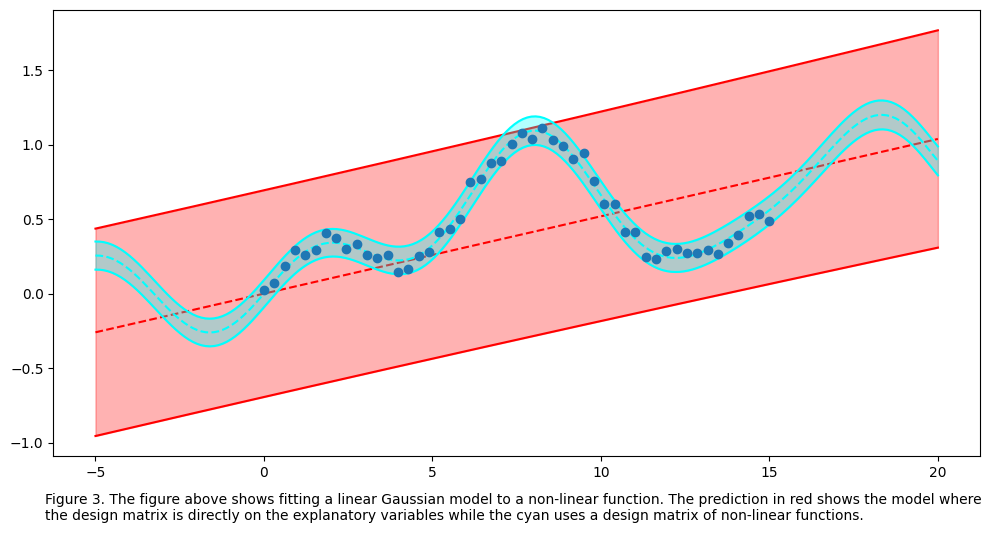

In [7]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Fit a simple linear model
m_linear = sm.OLS(y, x)
results = m_linear.fit()

# Design matrix with additional basis function -np.sin(x)
design = np.concatenate((
    np.sin(x).reshape(-1, 1),
    np.sin(x**2 / 40).reshape(-1, 1),
    x.reshape(-1, 1),
    -np.sin(x).reshape(-1, 1)
), axis=1)
m_linear_basis = sm.OLS(y, design)
results_basis = m_linear_basis.fit()

# Predictions
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
design_pred = np.concatenate((
    np.sin(x_pred),
    np.sin(x_pred**2 / 40),
    x_pred,
    -np.sin(x_pred)
), axis=1)

y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

# Plotting
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

# Linear model predictions
ax.plot(x_pred, y_pred_linear['mean'], color='red', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_lower'], color='red', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_upper'], color='red', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear['obs_ci_lower'], y_pred_linear['obs_ci_upper'], color='red', alpha=0.3, zorder=1)

# Basis model predictions
ax.plot(x_pred, y_pred_linear_basis['mean'], color='cyan', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'], color='cyan', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'], color='cyan', alpha=0.3, zorder=1)

fig.text(.05, -.05, "Figure 3. The figure above shows fitting a linear Gaussian model to a non-linear function. The prediction in red shows the model where\nthe design matrix is directly on the explanatory variables while the cyan uses a design matrix of non-linear functions.")

plt.tight_layout()
plt.show()

In [8]:
print(results_basis.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2592.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):                    3.49e-52
Time:                        22:33:05   Log-Likelihood:                          85.315
No. Observations:                  50   AIC:                                     -164.6
Df Residuals:                      47   BIC:                                     -158.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

As you can see from the the last example if we have multiple possible explanations we end up with a model where there are several symmetric explanations that cannot be differentiated under the objective function.
To overcome we have to encode a *preference* to the solution we want.

# Regularisation

In order to encode a preference towards specific solutions, we will include an additional term in the objective that depends only on the parameters $\beta$. This is commonly done using an $L_p$-norm:

$$
\hat{\beta} = \arg \max_{\beta} \prod_{i=1}^{N} p(y_i | x_i, \beta) + \alpha \left( \sum_{j=1}^{d} |\beta_j|^p \right)^{\frac{1}{p}}.
$$

The two most commonly used norms are the $L_2$, referred to as *ridge regression*, as it encodes a preference towards solutions where the parameters take equally large values, and $L_1$, referred to as *lasso*, as it prefers solutions that "home in" on a few active parameters to explain the data.

The following plot shows the regularisation surfaces of $L_2$ in blue and $L_1$ regularisation in red.

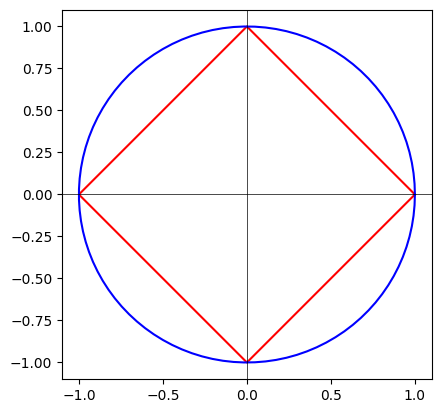

In [9]:
plt.plot([1, 0, -1, 0, 1], [0, 1, 0, -1, 0], 'r')  # L1
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), 'b')  # L2

plt.gca().set_aspect('equal', 'box'), plt.axhline(0, color='k', linewidth=0.5), plt.axvline(0, color='k', linewidth=0.5)
plt.show()

In `statsmodels` we can use the regularisation above by changing the call to fit the model from `fit` to `fit_regularised`. Taking two additional scalar parameters `alpha` and `L1_wt` where the former sets the strength of regularizer and the latter balances the L1 and L2 regularization.

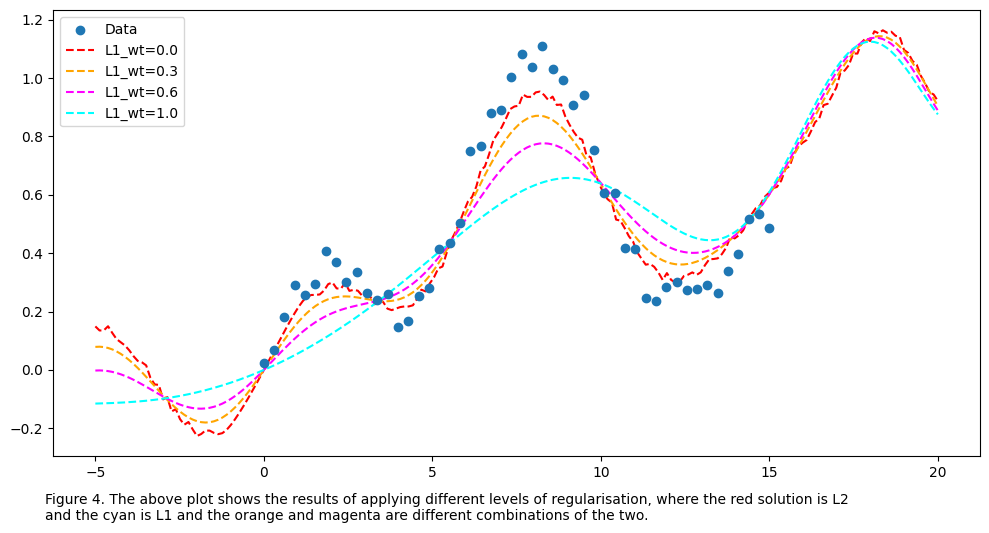

In [10]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Create design matrix
design = np.concatenate((np.sin(x).reshape(-1, 1),
                         np.sin(x**2 / 40).reshape(-1, 1),
                         x.reshape(-1, 1),
                         np.sin(x**2 / 20).reshape(-1, 1),
                         np.sin(x**3).reshape(-1, 1)), axis=1)

# Fit regularized models with different L1 weights
m_linear_basis = sm.OLS(y, design)
results_basis_0 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=0.0)
results_basis_1 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=0.3)
results_basis_2 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=0.6)
results_basis_3 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=1.0)

# Prediction data
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
design_pred = np.concatenate((np.sin(x_pred),
                              np.sin(x_pred**2 / 40),
                              x_pred,
                              np.sin(x_pred**2 / 20),
                              np.sin(x_pred**3)), axis=1)

# Predictions for each model
y_pred_0 = results_basis_0.predict(design_pred)
y_pred_1 = results_basis_1.predict(design_pred)
y_pred_2 = results_basis_2.predict(design_pred)
y_pred_3 = results_basis_3.predict(design_pred)

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, zorder=2, label="Data")
ax.plot(x_pred, y_pred_0, color='red', linestyle='--', zorder=1, label="L1_wt=0.0")
ax.plot(x_pred, y_pred_1, color='orange', linestyle='--', zorder=1, label="L1_wt=0.3")
ax.plot(x_pred, y_pred_2, color='magenta', linestyle='--', zorder=1, label="L1_wt=0.6")
ax.plot(x_pred, y_pred_3, color='cyan', linestyle='--', zorder=1, label="L1_wt=1.0")

ax.legend()
fig.text(.05, -.05, "Figure 4. The above plot shows the results of applying different levels of regularisation, where the red solution is L2\nand the cyan is L1 and the orange and magenta are different combinations of the two.")
plt.tight_layout()
plt.show()

# Localised Basis Functions

Another way to think about designing a set of basis functions is to make them connected to the data, we could think about placing a non-linear transformation of each point

$$
y_i = \sum_{j=1}^{N} \beta_j \, \phi(x_j , x_i)
$$

$$
\phi(x_j , x_i) = e^{- (x_i - x_j)^T (x_i - x_j)}
$$

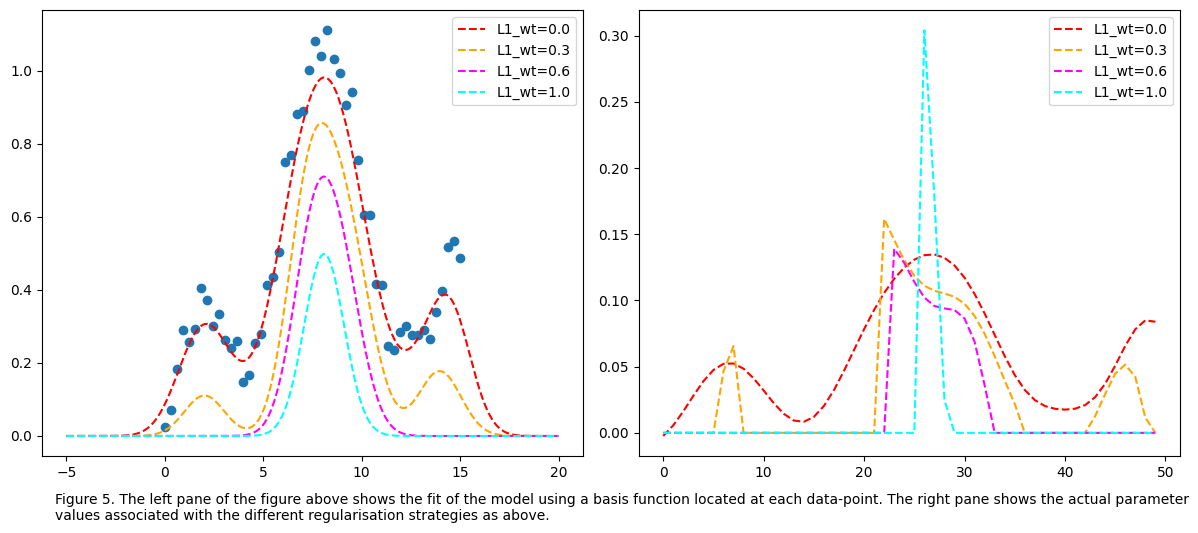

In [11]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Define the RBF kernel function for localized basis functions
def rbf_kernel(x1, x2, length_scale=1.0):
    return np.exp(-((x1 - x2.T) ** 2) / (2 * length_scale ** 2))

# Create the design matrix using RBF kernel
phi = rbf_kernel(x[:, np.newaxis], x[:, np.newaxis])

# Fit regularized models with different L1 weights
m_rbf_basis = sm.OLS(y, phi)
results_rbf_0 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=0.0)
results_rbf_1 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=0.3)
results_rbf_2 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=0.6)
results_rbf_3 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=1.0)

# Prediction data
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
phi_pred = rbf_kernel(x_pred, x)

# Predictions for each model
y_pred_rbf_0 = results_rbf_0.predict(phi_pred)
y_pred_rbf_1 = results_rbf_1.predict(phi_pred)
y_pred_rbf_2 = results_rbf_2.predict(phi_pred)
y_pred_rbf_3 = results_rbf_3.predict(phi_pred)

# Extract parameter values for each model
params_0 = results_rbf_0.params
params_1 = results_rbf_1.params
params_2 = results_rbf_2.params
params_3 = results_rbf_3.params

# Plot model fit and parameter values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Model fit with different regularization levels
ax1.scatter(x, y)
ax1.plot(x_pred, y_pred_rbf_0, '--', color='red', label="L1_wt=0.0")
ax1.plot(x_pred, y_pred_rbf_1, '--', color='orange', label="L1_wt=0.3")
ax1.plot(x_pred, y_pred_rbf_2, '--', color='magenta', label="L1_wt=0.6")
ax1.plot(x_pred, y_pred_rbf_3, '--', color='cyan', label="L1_wt=1.0")
ax1.legend()

# Parameter values for each regularization strategy
ax2.plot(range(len(params_0)), params_0, '--', color='red', label="L1_wt=0.0")
ax2.plot(range(len(params_1)), params_1, '--', color='orange', label="L1_wt=0.3")
ax2.plot(range(len(params_2)), params_2, '--', color='magenta', label="L1_wt=0.6")
ax2.plot(range(len(params_3)), params_3, '--', color='cyan', label="L1_wt=1.0")
ax2.legend()

fig.text(.05, -.05, "Figure 5. The left pane of the figure above shows the fit of the model using a basis function located at each data-point. The right pane shows the actual parameter\nvalues associated with the different regularisation strategies as above.")

plt.tight_layout()
plt.show()

As we can see from the figure above, the interpretation of the solution for the localised basis function model changes slightly. What we can now say is something similar to, "how important is each of the training data points for prediction". Especially interesting is the very strongly regularised solution shown in cyan. This can be interpreted as "if we want to predict the data, which is the single most representative point". The notion of a localised basis function can through this interpretation provide a rich explanation that is often very interpretable.

The type of data-centric basis functions that we explained above are very commonly used and if continue your study of machine learning during the year you will see a lot more of these basis functions as they are the foundation of a large range of different models from Support Vector Machines Vapnik, 1999 to Gaussian processes Rasmussen et al., 2006. Importantly as they solve an $N \times N$ regression problem the crucial ingredient is how do we regularise to solution space so that we can recover a solution.


# Applying Model Framework

You should now try out the model framework that we described above on a dataset derived from the 2021 UK Census Dataset.

Let's start by downloading the data.

In [12]:
import requests
import zipfile
import io
import os
import pandas as pd


def download_census_data(code, base_dir=''):
  url = f'https://www.nomisweb.co.uk/output/census/2021/census2021-{code.lower()}.zip'
  extract_dir = os.path.join(base_dir, os.path.splitext(os.path.basename(url))[0])

  if os.path.exists(extract_dir) and os.listdir(extract_dir):
    print(f"Files already exist at: {extract_dir}.")
    return

  os.makedirs(extract_dir, exist_ok=True)
  response = requests.get(url)
  response.raise_for_status()

  with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall(extract_dir)

  print(f"Files extracted to: {extract_dir}")

def load_census_data(code, level='msoa'):
  return pd.read_csv(f'census2021-{code.lower()}/census2021-{code.lower()}-{level}.csv')

In [173]:
download_census_data('TS007') # Age by single year of age

age_df = load_census_data('TS007', level='ltla')
# Preparing the columns we want
age_df = age_df.drop(age_df.columns[[0,2,3,4,10,16,23,28,34,45,61,77,88,99,115]], axis=1).set_index('geography')
age_df.columns = range(100)

Files already exist at: census2021-ts007.


Below we will plot the overall age structure of the UK population in 2021. This profile is not very straightforward, and has historical reasons. Have a look online to understand the data better - you should see a similar chart [here](https://en.wikipedia.org/wiki/Demographics_of_England).

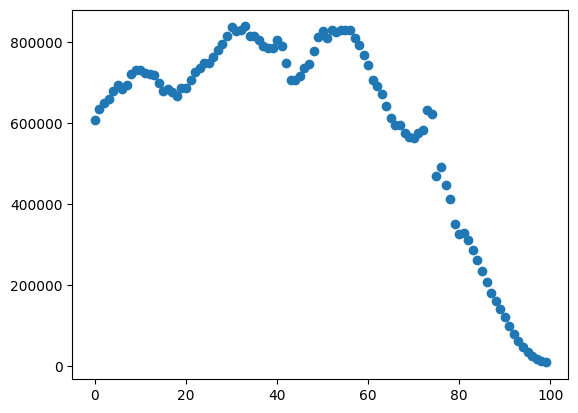

In [14]:
plt.scatter(range(100), age_df.sum(axis=0))
plt.show()

The data looks very different when we look at individual cities. For example, Cambridge has a very different age profile than most of the UK.

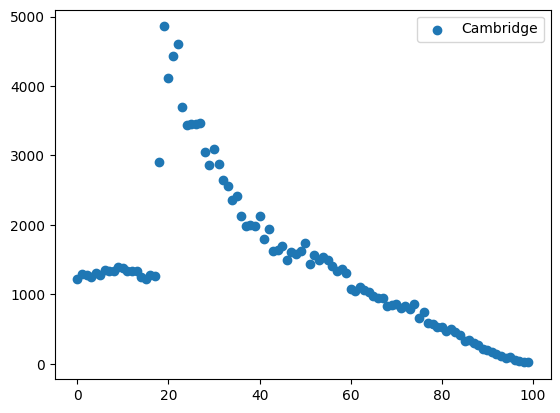

In [15]:
x_values = range(100)

plt.scatter(x_values, age_df.loc['Cambridge'], label='Cambridge')

plt.legend()
plt.show()

Now try to use the framework that we have derived to explain the two data-sets above. There is no right or wrong answer here, what we are looking for is a motivation of why you have made the choices that you have made
and how this effects the conclusions that you can draw.

### Exercise 1

Would it make sense to split up the data-set in different regions and fit separate models If so, what is the criteria that you split the data using?

### Exercise 1

Write your answer to exercise 1 here

In [520]:
# Use this box for any code you need


For the UK Population, I would expect to separate people below 60 years old from those above 60, since they are clearly different shapes. 

For people below 60, the plots follow a sine curve, since the population size increases and decreases sinusoidally for three complete cycles. This could be due to economic or sociocultural factors, such as baby booms leading to strain of medical resources and amenities, overspending or frugality depending on the economic cycle, or even because more parents lead to more children and vice versa (the sine curve has a period of approximately 22 years). I find it unlikely that this could be modelled by a Gaussian distribution, since for different periods the plots are exclusively above or below the mean, and it is also unlikely it should split into three quadratic curves since it implies a rapid decrease at the ends, which is unlikely for a population below 60 years old.

For people above 60, the plots could follow a decreasing exponential curve. It is unlikely to be linear since there is a tilt towards the asymptote, and the curve cannot possibly go through the x-axis to have a negative population. It is also unlikely to be quadratic since it is unlikely to go up again.

For the Cambridge Population, I would expect to separate people below 18 years old from those above 18 again because of the different shapes.

For people below 18, the plots could be linearly related, although it could also be a very mild quadratic one (although I think that would be overfitting the slight increase in 10 year olds).

For people above 18, the plots could also follow a decreasing exponential curve for the same reason as above: it should be asymptotic towards the x-axis.

### Exercise 2

What would be a sensible design matrix?

### Exercise 2

Write your answer to exercise 2 here

In [17]:
# Use this box for any code you need

For the UK Population, I propose the following model:

$$
y = \beta_0 1_{x<60} + \beta_1 \sin\left(\frac{\pi x}{11}\right) 1_{x<60} + \beta_2 \cos\left(\frac{\pi x}{11}\right) 1_{x<60} + \beta_3 e^{-x} 1_{x\ge60}
$$

where $y$ is the population size and $x$ is the age group. Note that 1 is an indicator variable that is 1 given the condition and 0 otherwise in the feature vector. Also note that my original vector for the sine curve is $\sin\left(\dfrac{2\pi}{22}x - k\right)$ since it has a period of about 22 years and could be translated by a certain amount horizontally by $k$, but $\sin\left(\dfrac{2\pi}{22}x - k\right) = \sin\left(\frac{\pi x}{11}\right)\cos(k) - \cos\left(\frac{\pi x}{11}\right)\sin(k) = \beta_1 \sin\left(\frac{\pi}{11}\right) + \beta_2 \cos\left(\frac{\pi}{11}\right)$. Lastly, I also expect there to be no constant added to the age group beyond 60 years old, since it must (unfortunately) hit 0 people at some age group after 100 years old.

This gives us the matrix:

$$
\begin{bmatrix}
1 & \sin\left(\frac{\pi x_0}{11}\right) & \cos\left(\frac{\pi x_0}{11}\right) & 0 \\
1 & \sin\left(\frac{\pi x_1}{11}\right) & \cos\left(\frac{\pi x_1}{11}\right) & 0 \\
\vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & e^{-x_{N-1}} \\
0 & 0 & 0 & e^{-x_{N}} \\
\end{bmatrix}
$$

For the Cambridge Population, I propose the following model:

$$
y = \beta_0 1_{x<18} + \beta_1 x 1_{x<18} + \beta_2 e^{-x} 1_{x\ge18}
$$

where $y$ is the population size and $x$ is the age group. My reasons are the same as those for the UK Population.

This gives us the matrix:

$$
\begin{bmatrix}
1 & x_0  & 0\\
1 & x_1  & 0\\
\vdots & \vdots & \vdots \\
0 & 0 & e^{-x_{N-1}} \\
0 & 0 & e^{-x_{N}} \\
\end{bmatrix}
$$

### Exercise 3

What GLM models would make sense to fit?

### Exercise 3

Write your answer to exercise 3 here

Since the curves both look continuous (in the respective regions) and show random Gaussian noise with few outliers. I propose the use of a Normal Distribution, in which case the link function is the identity. This means we must fit the model for:

$$y \sim \mathcal{N}\left(\beta_0 1_{x<60} + \beta_1 \sin\left(\frac{\pi x}{11}\right) 1_{x<60} + \beta_2 \cos\left(\frac{\pi x}{11}\right) 1_{x<60} + \beta_3 e^{-x} 1_{x\ge60}, \sigma^2\right)\ \ (for\ UK)$$
$$y \sim \mathcal{N}\left(\beta_0 1_{x<18} + \beta_1 x 1_{x<18} + \beta_2 e^{-x} 1_{x\ge18}, \sigma^2\right)\ \ (for\ Cambridge)$$ 

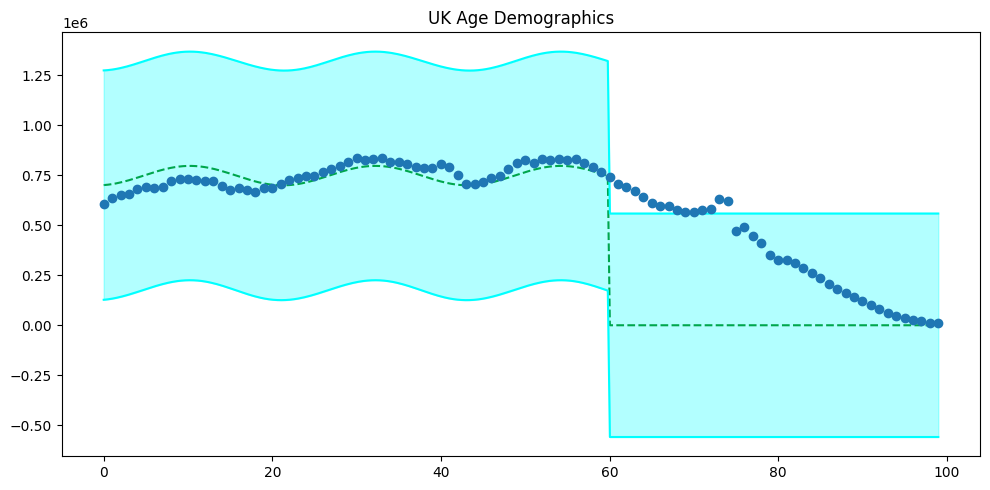

In [584]:
x = np.linspace(0,99, 100)
y = age_df.sum(axis=0)
design = np.concatenate((np.where(x<60, 1, 0).reshape(-1, 1), 
                         np.where(x<60, np.sin(np.pi * x / 11), 0).reshape(-1, 1),
                         np.where(x<60, np.cos(np.pi * x / 11), 0).reshape(-1, 1), 
                         np.where(x>=60, np.exp(-x), 0).reshape(-1, 1)), axis=1)
m_linear_basis = sm.OLS(y, design)

results_basis = m_linear_basis.fit()

# Predictions
x_pred = np.linspace(0, 99, 400).reshape(-1, 1)
design_pred = np.concatenate((np.where(x_pred<60, 1, 0).reshape(-1, 1), 
                              np.where(x_pred<60, np.sin(np.pi * x_pred / 11), 0).reshape(-1, 1),
                              np.where(x_pred<60, np.cos(np.pi * x_pred / 11), 0).reshape(-1, 1), 
                              np.where(x_pred>=60, np.exp(-x_pred), 0).reshape(-1, 1)), axis=1)

y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

# Plotting
x = range(100)
y = age_df.sum(axis=0)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

# Basis model predictions
ax.plot(x_pred, y_pred_linear_basis['mean'], color='green', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'], color='cyan', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'], color='cyan', alpha=0.3, zorder=1)
plt.title("UK Age Demographics")
plt.tight_layout()
plt.show()

This graph shows some worrying trends. Firstly, the exponential curve to the right of $x = 60$ is too flat, an explanation for this is that $y = e^{-x}$ is too constant at $x = 60$. Hence, we should translate it by 60 units. Moreover, as we need to show a smooth line across $x = 60$ to $x = 100$, we scale $x$ by a factor of 10 units (since $e^{-4}$ is roughly 0.01 and we can see the full transition).

Another cause for concern is that our sinusoidal curve does not seem to fit very well, and is off by some linear factor of $x$. Hence, we should add another feature vector there.

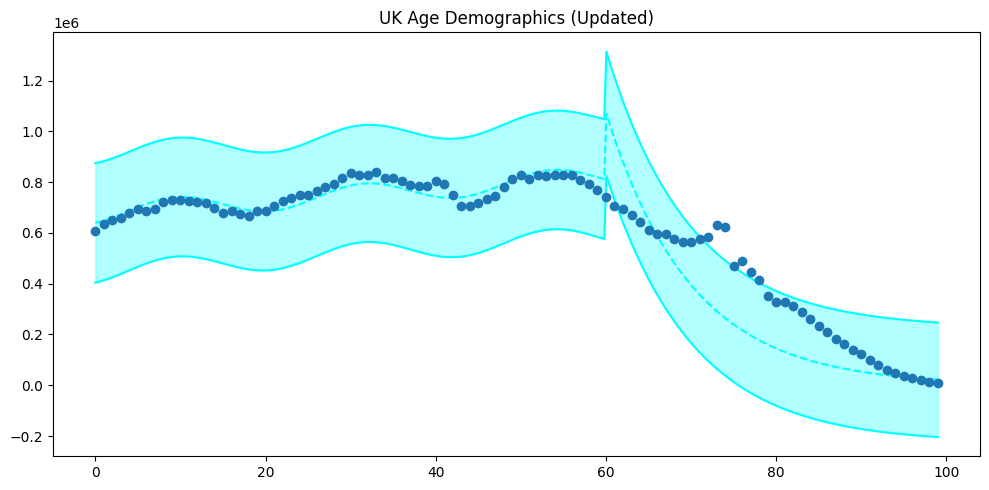

In [583]:
x = np.linspace(0,99, 100)
y = age_df.sum(axis=0)
design = np.concatenate((np.where(x<60, 1, 0).reshape(-1, 1), 
                         np.where(x<60, x, 0).reshape(-1, 1), 
                         np.where(x<60, np.sin(np.pi * x / 11), 0).reshape(-1, 1),
                         np.where(x<60, np.cos(np.pi * x / 11), 0).reshape(-1, 1), 
                         np.where(x>=60, np.exp(-0.1*(x-60)), 0).reshape(-1, 1)), axis=1)
m_linear_basis = sm.OLS(y, design)

results_basis = m_linear_basis.fit()

# Predictions
x_pred = np.linspace(0, 99, 400).reshape(-1, 1)
design_pred = np.concatenate((np.where(x_pred<60, 1, 0).reshape(-1, 1), 
                              np.where(x_pred<60, x_pred, 0).reshape(-1, 1), 
                              np.where(x_pred<60, np.sin(np.pi * x_pred / 11), 0).reshape(-1, 1),
                              np.where(x_pred<60, np.cos(np.pi * x_pred / 11), 0).reshape(-1, 1), 
                              np.where(x_pred>=60, np.exp(-0.1*(x_pred-60)), 0).reshape(-1, 1)), axis=1)

y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

# Plotting
x = range(100)
y = age_df.sum(axis=0)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

# Basis model predictions
ax.plot(x_pred, y_pred_linear_basis['mean'], color='cyan', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'], color='cyan', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'], color='cyan', alpha=0.3, zorder=1)
plt.title("UK Age Demographics (Updated)")
plt.tight_layout()
plt.show()

This looks much better -- the sinusoidal curve fits better and the exponential curve actually fits the downward trend. However, that the curve is not as smooth as we might have liked at $x = 60$ to $x = 65$. This is clearly caused by the outliers at $x = 72$, but we should not try to fix them. Those are outliers, for 72 year olds were approximately born in 1949, there was clearly a baby boom after the war, so to model this fact in our feature is meaningless as it changes every year.

We hence update our model and matrix to:

$$
y = \beta_0 1_{x<60} + \beta_1 x 1_{x<60} + \beta_2 \sin\left(\frac{\pi x}{11}\right) 1_{x<60} + \beta_3 \cos\left(\frac{\pi x}{11}\right) 1_{x<60} + \beta_4 e^{-0.1(x-60)} 1_{x\ge60}
$$

$$
\begin{bmatrix}
1 & x_1 & \sin\left(\frac{\pi x_0}{11}\right) & \cos\left(\frac{\pi x_0}{11}\right) & 0 \\
1 & x_2 & \sin\left(\frac{\pi x_1}{11}\right) & \cos\left(\frac{\pi x_1}{11}\right) & 0 \\
\vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & e^{-0.1(x_{N-1}-60)} \\
0 & 0 & 0 & 0 & e^{-0.1(x_{N}-60)} \\
\end{bmatrix}
$$

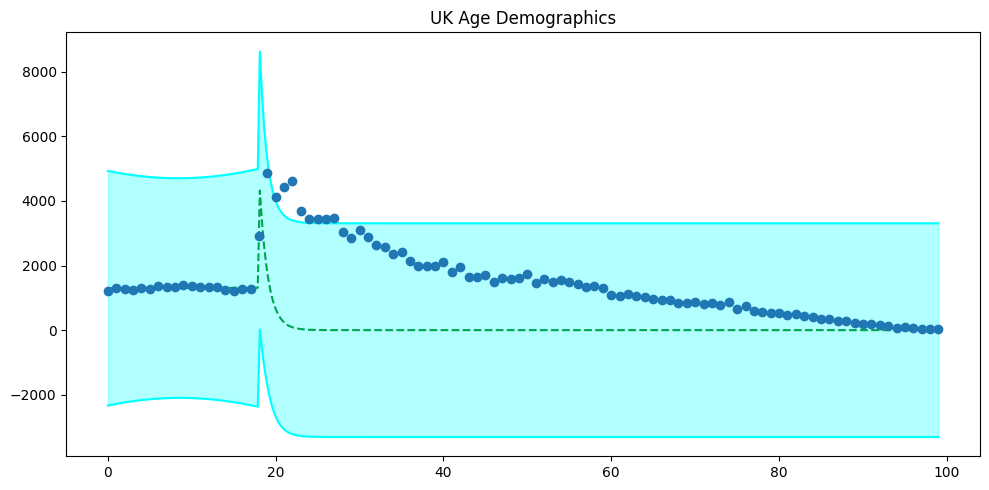

In [588]:
x = np.linspace(0,99, 100)
y = age_df.loc['Cambridge']
design = np.concatenate((np.where(x<18, 1, 0).reshape(-1, 1), 
                         np.where(x<18, x, 0).reshape(-1, 1), 
                         np.where(x>=18, np.exp(-x), 0).reshape(-1, 1)), axis=1)
m_linear_basis = sm.OLS(y, design)

results_basis = m_linear_basis.fit()

# Predictions
x_pred = np.linspace(0, 99, 400).reshape(-1, 1)
design_pred = np.concatenate((np.where(x_pred<18, 1, 0).reshape(-1, 1), 
                              np.where(x_pred<18, x_pred, 0).reshape(-1, 1), 
                              np.where(x_pred>=18, np.exp(-x_pred), 0).reshape(-1, 1)), axis=1)

y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

# Plotting
x = range(100)
y = age_df.loc['Cambridge']
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

# Basis model predictions
ax.plot(x_pred, y_pred_linear_basis['mean'], color='green', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'], color='cyan', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'], color='cyan', alpha=0.3, zorder=1)
plt.title("UK Age Demographics")
plt.tight_layout()
plt.show()

Again we run into the same problem. To show the full curve across 80 years, we should scale it by 20 and translate it by 18.

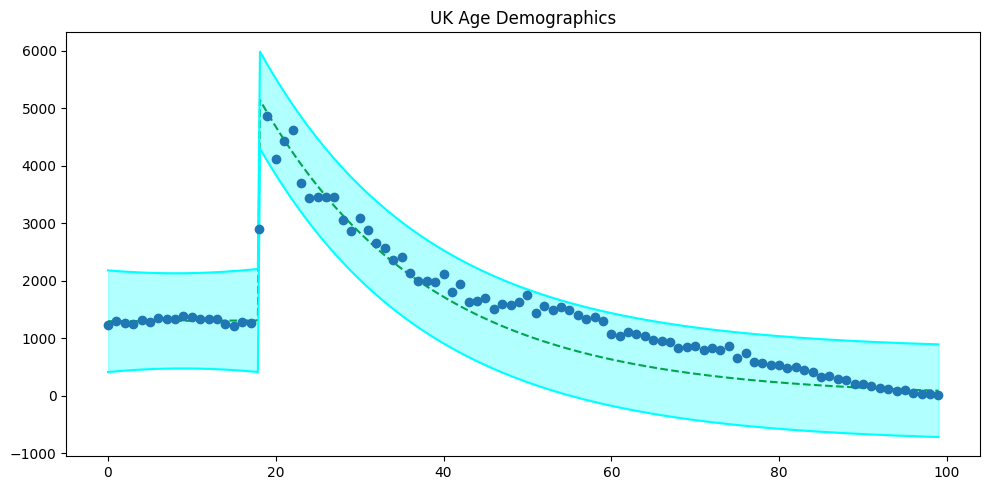

In [591]:
x = np.linspace(0,99, 100)
y = age_df.loc['Cambridge']
design = np.concatenate((np.where(x<18, 1, 0).reshape(-1, 1), 
                         np.where(x<18, x, 0).reshape(-1, 1), 
                         np.where(x>=18, np.exp(-0.05*(x-18)), 0).reshape(-1, 1)), axis=1)
m_linear_basis = sm.OLS(y, design)

results_basis = m_linear_basis.fit()

# Predictions
x_pred = np.linspace(0, 99, 400).reshape(-1, 1)
design_pred = np.concatenate((np.where(x_pred<18, 1, 0).reshape(-1, 1), 
                              np.where(x_pred<18, x_pred, 0).reshape(-1, 1), 
                              np.where(x_pred>=18, np.exp(-0.05*(x_pred-18)), 0).reshape(-1, 1)), axis=1)

y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

# Plotting
x = range(100)
y = age_df.loc['Cambridge']
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

# Basis model predictions
ax.plot(x_pred, y_pred_linear_basis['mean'], color='green', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'], color='cyan', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'], color='cyan', alpha=0.3, zorder=1)
plt.title("UK Age Demographics")
plt.tight_layout()
plt.show()

The fit is not perfect, perhaps we can add a sinusoidal curve to the exponential component, or a quadratic one (since there is a peak near $x = 60$).

Our new model and matrix are:

$$
y = \beta_0 1_{x<18} + \beta_1 x 1_{x<18} + \beta_2 e^{-0.05(x-18)} 1_{x\ge18}
$$

$$
\begin{bmatrix}
1 & x_0  & 0\\
1 & x_1  & 0\\
\vdots & \vdots & \vdots \\
0 & 0 & e^{-0.05(x_{N-1}-18)} \\
0 & 0 & e^{-0.05(x_{N}-18)} \\
\end{bmatrix}
$$

During the check-session we will ask you a few questions on how you have reasoned when fitting the data.
Again, what we are looking for is motivation not "the best fit".

# Practical Modelling

## Linear modelling

You probably inferred in the previous exercise, that age-profiles of individual cities are heavilly impacted by students. Let's use data from the 2021 Census to try and predict age profile information of all cities.

What we actually will be predicting, is the share of population in a given city that is of a certain age, given NS-SEC information. Let's normalise the `age_df` and select the share of 21-year-olds in each city. This is the value we are trying to predict.

In [19]:
norm_age_df = age_df.div(age_df.sum(axis=1), axis=0)
norm_age_df[21]

geography
Hartlepool              0.010984
Middlesbrough           0.013739
Redcar and Cleveland    0.009384
Stockton-on-Tees        0.009223
Darlington              0.009621
                          ...   
Torfaen                 0.008964
Monmouthshire           0.007328
Newport                 0.010134
Powys                   0.007910
Merthyr Tydfil          0.010640
Name: 21, Length: 331, dtype: float64

### Exercise 4

We don't have any data to make a model yet - let's change that. Select features to use, starting with the relative student population of each city (`L15` in `TS062`).

Make a LinearRegression model to find the relationship between the student population in a city, and the percentage of 21 year olds there. Use the model to make predictions and examine the predictive power by plotting the correlation of `y` and `y_pred`.

### Exercise 4

Write your answer to exercise 4 here

Let us first analyse the dataset for the student population (`norm_students_df`) as the source of our feature vector, and the datasets for 21 year olds (`norm_age_df`) as the source for our response vector.

In [753]:
# Use this box for any code you need

download_census_data("TS062")
student_df = load_census_data("TS062", level='ltla')
students = "National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students"
population = "National Statistics Socio-economic Classification (NS-SEC): Total: All usual residents aged 16 years and over"
norm_student_df = student_df
norm_student_df[norm_student_df.select_dtypes(include='number').columns] = student_df.select_dtypes(include='number').div(student_df[population], axis=0)
norm_student_df[["geography", students]] #feature vector df

Files already exist at: census2021-ts062.


,geography,National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students
0,Hartlepool,0.060761
1,Middlesbrough,0.101415
2,Redcar and Cleveland,0.053711
3,Stockton-on-Tees,0.060167
4,Darlington,0.052619
...,...,...
326,Torfaen,0.051255
327,Monmouthshire,0.047086
328,Newport,0.062932
329,Powys,0.042982


In [271]:
norm_age_df[[21]] #response vector df

,21
geography,
Hartlepool,0.010984
Middlesbrough,0.013739
Redcar and Cleveland,0.009384
Stockton-on-Tees,0.009223
Darlington,0.009621
...,...
Torfaen,0.008964
Monmouthshire,0.007328
Newport,0.010134


In [473]:
merged_df = pd.merge(norm_age_df, norm_student_df, on='geography', how='inner')
feature = merged_df[[students]]
response = merged_df[[21]]

In [474]:
feature

,National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students
0,0.060761
1,0.101415
2,0.053711
3,0.060167
4,0.052619
...,...
326,0.051255
327,0.047086
328,0.062932
329,0.042982


In [475]:
response

,21
0,0.010984
1,0.013739
2,0.009384
3,0.009223
4,0.009621
...,...
326,0.008964
327,0.007328
328,0.010134
329,0.007910


In [476]:
feature = sm.add_constant(feature)
model = sm.OLS(response, feature)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     21   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     2583.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          7.62e-158
Time:                        02:54:28   Log-Likelihood:                 1655.2
No. Observations:                 331   AIC:                            -3306.
Df Residuals:                     329   BIC:                            -3299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                  0.0022      0.000     11.231      0.000       0.002       0.003
National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students     0.1278      0.003     50.826      0.000       0.123       0.133
==============================================================================
Omnibus:                       31.750   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.647
Skew:                           0.254   Prob(JB):                     8.57e-28
Kurtosis:                       5.963   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

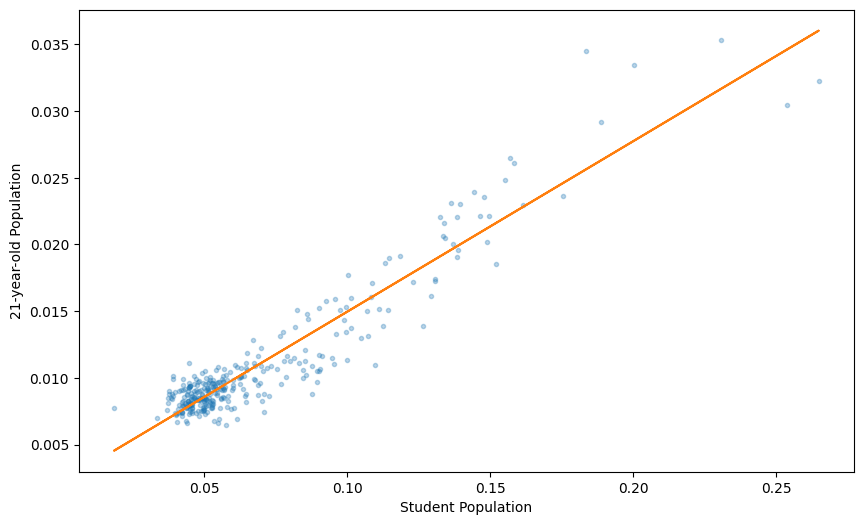

<Figure size 640x480 with 0 Axes>

In [478]:
import matplotlib.pyplot as plt
import mlai
from mlai import plot

fig, ax = plt.subplots(figsize=mlai.plot.big_wide_figsize)
ax.plot(feature[[students]], response, '.', alpha=0.3)

# Plot the fitted line
ax.plot(feature[[students]], results.predict(feature), '-')

ax.set_xlabel('Student Population')
ax.set_ylabel('21-year-old Population')
plt.show()
mlai.write_figure("linear-regression-olympic-marathon-men-statsmodels.svg", directory="./data-science")

The linear regression model looks like a good model for our data, since there is a R-squared value of 0.887.

However, predictions may not be accurate where student population > 0.2, since we don't have sufficient information beyond that and may have to extrapolate.

Moreover, the standard deviation near student population = 0.05 is still quite high, since there is a whole cluster there. The kurtosis is 5.963, which is high, indicating the presence of outliers, hence predictions may be wrong.

### Exercise 5

Now repeat the above analysis using all 9 NS-SEC classification values as features. Interpret the results, including correlation. Does the new model perform better?

### Exercise 5

Write your answer to exercise 5 here

In [281]:
# Use this box for any code you need

features = merged_df.iloc[:,104:] # 9 feature vectors
features

,"National Statistics Socio-economic Classification (NS-SEC): L1, L2 and L3 Higher managerial, administrative and professional occupations","National Statistics Socio-economic Classification (NS-SEC): L4, L5 and L6 Lower managerial, administrative and professional occupations",National Statistics Socio-economic Classification (NS-SEC): L7 Intermediate occupations,National Statistics Socio-economic Classification (NS-SEC): L8 and L9 Small employers and own account workers,National Statistics Socio-economic Classification (NS-SEC): L10 and L11 Lower supervisory and technical occupations,National Statistics Socio-economic Classification (NS-SEC): L12 Semi-routine occupations,National Statistics Socio-economic Classification (NS-SEC): L13 Routine occupations,National Statistics Socio-economic Classification (NS-SEC): L14.1 and L14.2 Never worked and long-term unemployed,National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students
0,0.070589,0.169376,0.110382,0.074914,0.067777,0.148033,0.157165,0.141004,0.060761
1,0.067467,0.152206,0.107383,0.069336,0.059322,0.139023,0.150608,0.153241,0.101415
2,0.073642,0.177317,0.110690,0.079196,0.079766,0.152420,0.149438,0.123819,0.053711
3,0.101304,0.196013,0.121568,0.075040,0.063857,0.127422,0.141004,0.113626,0.060167
4,0.103570,0.194620,0.123603,0.082890,0.059361,0.129198,0.152080,0.102060,0.052619
...,...,...,...,...,...,...,...,...,...
326,0.086748,0.189432,0.124850,0.076430,0.071358,0.147043,0.164244,0.088639,0.051255
327,0.158118,0.234781,0.107836,0.124324,0.052659,0.106609,0.109434,0.059152,0.047086
328,0.109925,0.193937,0.127897,0.075858,0.058255,0.123730,0.149235,0.098232,0.062932
329,0.099888,0.201793,0.101905,0.188055,0.059972,0.126031,0.116798,0.062576,0.042982


In [468]:
design = np.concatenate([merged_df.iloc[:, i].values.reshape(-1, 1) for i in range(104, 113)], axis=1)
m_linear_basis = sm.OLS(response.values.flatten(), design)
results = m_linear_basis.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     679.5
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          1.38e-196
Time:                        02:52:40   Log-Likelihood:                 1771.6
No. Observations:                 331   AIC:                            -3525.
Df Residuals:                     322   BIC:                            -3491.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0077      0.004     -1.902      0.058      -0.016       0.000
x2             0.0003      0.007      0.047      0.963      -0.013       0.013
x3             0.0018      0.006      0.298      0.766      -0.010       0.013
x4            -0.0070      0.003     -2.269      0.024      -0.013      -0.001
x5             0.0445      0.015      2.904      0.004       0.014       0.075
x6             0.0214      0.008      2.714      0.007       0.006       0.037
x7             0.0014      0.004      0.333      0.740      -0.007       0.010
x8            -0.0342      0.003     -9.954      0.000      -0.041      -0.027
x9             0.1460      0.002     68.683      0.000       0.142       0.150
==============================================================================
Omnibus:                       67.709   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              754.073
Skew:                          -0.424   Prob(JB):                    1.80e-164
Kurtosis:                      10.346   Cond. No.                         91.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value is 0.943, a clear improvement from 0.887 in Exercise 4. This means that there is a greater correlation.

We observe that coefficient of L15 is still the greatest at 0.146. This indicates that proportion of full-time students has the greatest influence of the 21-year-old age group population, which makes sense since all other features have occupations which are likely done by people over 21-years-old. The next most important feature (at 0.0445) is the fifth, L11, which also makes sense since lower supervisory and technical operations are likely to be performed by younger people at 21-years-old. On the other hand, the eighth feature L14.1 and L14.2 is the most negative, it follows that 21-year-olds are less likely to be unemployed given the demand for graduates is huge.

However, the Kurtosis has also increased. This means there is a greater likelihood of outliers. 

(It is difficult to plot a graph in this case because there are 9 + 1 = 10 dimensions.)

## Regularisation

The prediction results achieved by your second model should be more accurate, with a correlation of about 97%. However, when using as many parameters as we are (9), we need to be wary of overfitting.

### Exercise 6

Examine if the model is overfitting using *k-fold cross-validation*.

- Randomly split the dataset into *k* subsets.
- Train a model, leaving one selected subset out for testing. Record the test performance on that subset.
- Iterate this for all subsets.

Do the results you get differ depending on the value of *k*? Plot this relationship. Does this match your expectations?

### Exercise 6

Write your answer to exercise 6 here

In [593]:
# Use this box for any code you need

def kfold(dataframe, groups):
    dataframe = dataframe.sample(frac=1).reset_index(drop=True)
    size = int(len(dataframe) / groups)
    total = size * groups
    features = [dataframe.iloc[i:i+size,104:] for i in range(0, total-1, size)]
    response = [dataframe.iloc[i:i+size,22] for i in range(0, total-1, size)]
    if total < len(dataframe):
        features[-1] = pd.concat([features[-1], dataframe.iloc[total:, 104:]])
        response[-1] = pd.concat([response[-1], dataframe.iloc[total:, 22]])
    return features[0], pd.concat(features[1:]), response[0], pd.concat(response[1:])
test_features, train_features, test_response, train_response = kfold(merged_df, 9)

In [594]:
train_features

,"National Statistics Socio-economic Classification (NS-SEC): L1, L2 and L3 Higher managerial, administrative and professional occupations","National Statistics Socio-economic Classification (NS-SEC): L4, L5 and L6 Lower managerial, administrative and professional occupations",National Statistics Socio-economic Classification (NS-SEC): L7 Intermediate occupations,National Statistics Socio-economic Classification (NS-SEC): L8 and L9 Small employers and own account workers,National Statistics Socio-economic Classification (NS-SEC): L10 and L11 Lower supervisory and technical occupations,National Statistics Socio-economic Classification (NS-SEC): L12 Semi-routine occupations,National Statistics Socio-economic Classification (NS-SEC): L13 Routine occupations,National Statistics Socio-economic Classification (NS-SEC): L14.1 and L14.2 Never worked and long-term unemployed,National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students
36,0.061858,0.138425,0.105707,0.078349,0.059584,0.145075,0.180970,0.146767,0.083266
37,0.172047,0.227697,0.122209,0.098478,0.045206,0.108210,0.092850,0.056858,0.076444
38,0.132119,0.201326,0.122081,0.113411,0.053563,0.101685,0.146983,0.061511,0.067321
39,0.121610,0.228246,0.125180,0.142142,0.062338,0.106421,0.112482,0.062458,0.039123
40,0.132043,0.182738,0.103353,0.114630,0.050139,0.101306,0.117753,0.113520,0.084519
...,...,...,...,...,...,...,...,...,...
326,0.099861,0.173220,0.119709,0.091113,0.058005,0.120264,0.185203,0.092467,0.060159
327,0.136370,0.209571,0.094891,0.134534,0.043280,0.091736,0.094868,0.109212,0.085538
328,0.159534,0.224815,0.095510,0.118373,0.037418,0.087812,0.071900,0.065294,0.139344
329,0.097008,0.188598,0.124689,0.118402,0.065664,0.121869,0.147189,0.089434,0.047148


In [595]:
train_response

36     0.011139
37     0.013174
38     0.011075
39     0.009889
40     0.010005
         ...   
326    0.009812
327    0.010187
328    0.023005
329    0.009931
330    0.009302
Name: 21, Length: 295, dtype: float64

In [596]:
test_features

,"National Statistics Socio-economic Classification (NS-SEC): L1, L2 and L3 Higher managerial, administrative and professional occupations","National Statistics Socio-economic Classification (NS-SEC): L4, L5 and L6 Lower managerial, administrative and professional occupations",National Statistics Socio-economic Classification (NS-SEC): L7 Intermediate occupations,National Statistics Socio-economic Classification (NS-SEC): L8 and L9 Small employers and own account workers,National Statistics Socio-economic Classification (NS-SEC): L10 and L11 Lower supervisory and technical occupations,National Statistics Socio-economic Classification (NS-SEC): L12 Semi-routine occupations,National Statistics Socio-economic Classification (NS-SEC): L13 Routine occupations,National Statistics Socio-economic Classification (NS-SEC): L14.1 and L14.2 Never worked and long-term unemployed,National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students
0,0.081547,0.176368,0.126801,0.069403,0.067103,0.144544,0.147784,0.130652,0.055799
1,0.085023,0.177489,0.127120,0.078123,0.073648,0.138926,0.163334,0.101234,0.055102
2,0.276618,0.252210,0.081551,0.094064,0.028564,0.061124,0.059318,0.069828,0.076722
3,0.094221,0.188503,0.107839,0.099777,0.073002,0.134008,0.175676,0.083879,0.043095
4,0.063611,0.150528,0.100792,0.101990,0.072346,0.148218,0.240292,0.074430,0.047791
5,0.118625,0.198043,0.111172,0.107377,0.064922,0.123509,0.148135,0.077681,0.050535
6,0.176499,0.232743,0.112184,0.129930,0.047929,0.104269,0.090566,0.050701,0.055179
7,0.162245,0.224566,0.134036,0.118914,0.045286,0.095873,0.080558,0.074141,0.064380
8,0.125496,0.213670,0.140253,0.074420,0.056037,0.125956,0.117712,0.096127,0.050329
9,0.067371,0.121959,0.090645,0.069570,0.044712,0.111685,0.210078,0.134350,0.149631


In [597]:
test_response

0     0.009388
1     0.009657
2     0.009513
3     0.008568
4     0.009689
5     0.009054
6     0.006894
7     0.008673
8     0.008065
9     0.022154
10    0.009930
11    0.013456
12    0.008411
13    0.008997
14    0.007382
15    0.009384
16    0.009678
17    0.013132
18    0.009677
19    0.011242
20    0.007731
21    0.007533
22    0.009862
23    0.010049
24    0.008589
25    0.010595
26    0.006674
27    0.009062
28    0.007614
29    0.006879
30    0.007743
31    0.007421
32    0.017381
33    0.009715
34    0.007415
35    0.008690
Name: 21, dtype: float64

In [653]:
from sklearn.metrics import mean_squared_error

def rmse(test_features, train_features, test_response, train_response):
    new_model = sm.OLS(np.array(train_response), np.array(train_features))
    results = new_model.fit()
    predicted_response = results.predict(np.array(test_features))
    return mean_squared_error(np.array(test_response), predicted_response)

In [495]:
error = []

for k in range(2, 11):
    te_f, tr_f, te_r, tr_r = kfold(merged_df, k)
    r = rmse(te_f, tr_f, te_r, tr_r)
    error += [r]
    print("The root mean squared error for k=" + str(k) + " is " + str(r))

The root mean squared error for k=2 is 1.647297510616529e-06
The root mean squared error for k=3 is 1.2806196142460176e-06
The root mean squared error for k=4 is 1.7883058125962087e-06
The root mean squared error for k=5 is 1.4491856315309174e-06
The root mean squared error for k=6 is 2.3405469350082704e-06
The root mean squared error for k=7 is 3.100558977211617e-06
The root mean squared error for k=8 is 9.250559828646799e-07
The root mean squared error for k=9 is 2.388126424810226e-06
The root mean squared error for k=10 is 1.4618513476905383e-06


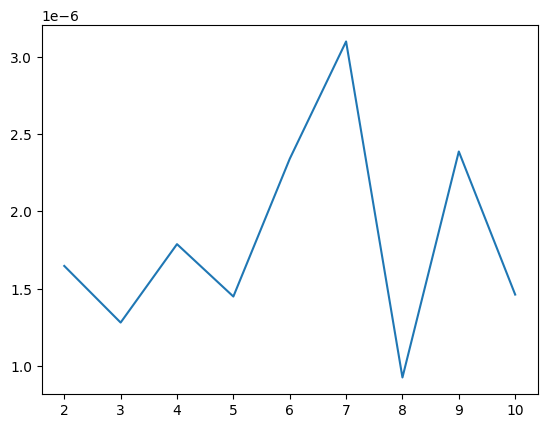

In [496]:
plt.plot([i for i in range(2, 11)], error)

Here, we can see that the root mean squared error is very small, at a margin of $10^{-6}$. It does well for any value of $k$, and it does not seem to increase or decrease with any value of $k$ in particular. Rerunning the code above will yield varying versions of this graph, hence different $k$ does not give different results.

This is in line with my expectations, since it shows that there is no overfitting. Overfitting occurs when the root mean square error is large, or when $k$ large (which means that the test set is very small and training set large) means it overfits on the training set and wrongly predicts the small test set (which is not really seen in the graph).

Moreover, a $R^2$ value between $y$ and $y_{pred}$ can be calculated below.

In [517]:
def rsquared(test_features, train_features, test_response, train_response):
    new_model = sm.OLS(np.array(train_response), np.array(train_features))
    results = new_model.fit()
    predicted_response = results.predict(np.array(test_features))
    y_model = sm.OLS(np.array(predicted_response), np.array(test_response))
    y_results = y_model.fit()
    return y_results.rsquared

rsq = []
for k in range(2, 11):
    te_f, tr_f, te_r, tr_r = kfold(merged_df, k)
    print("For k=" + str(k) + ", R^2 =", rsquared(te_f, tr_f, te_r, tr_r))
    rsq += [rsquared(te_f, tr_f, te_r, tr_r)]

For k=2, R^2 = 0.9869247570414944
For k=3, R^2 = 0.9914976205071734
For k=4, R^2 = 0.9865281858398727
For k=5, R^2 = 0.9907774460671221
For k=6, R^2 = 0.98626986013572
For k=7, R^2 = 0.9841038883969908
For k=8, R^2 = 0.9872124606368513
For k=9, R^2 = 0.9935327168113857
For k=10, R^2 = 0.9833219687560196


The $R^2$ values are all close to 1, which indicate a close relationship between $y$ and $y_{pred}$. Hence $k$-fold cross-validation shows that there is little overfitting, considering how close the predicted values are to the actual values.

The graph below also shows that it fluctuates about 0.99, which is a strong correlation regardless of the value of $k$.

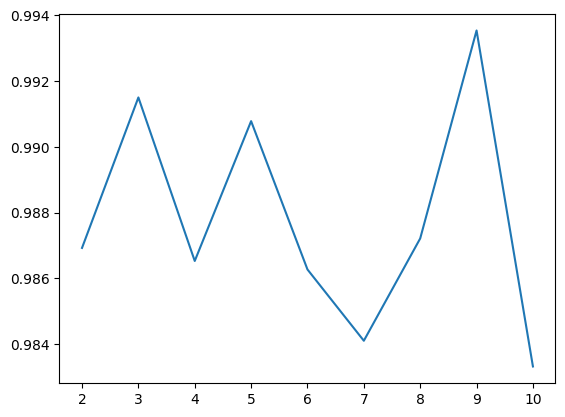

In [518]:
plt.plot(range(2, 11), rsq)

### Exercise 7

If you found evidence of overfitting, address this by employing both L1 and L2 regularisation. Compare the results against your baseline model. How did you choose alpha values? What do the results say about potential feature selection?

### Exercise 7

Write your answer to exercise 7 here

In [626]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [628]:
import seaborn as sns
import matplotlib.pyplot as plt

In [654]:
def rmse_regularised(test_features, train_features, test_response, train_response, alpha, L1_wt):
    new_model = sm.OLS(np.array(train_response), np.array(train_features))
    results = new_model.fit_regularized(alpha=alpha, L1_wt=L1_wt)
    predicted_response = results.predict(np.array(test_features))
    return mean_squared_error(np.array(test_response), predicted_response)

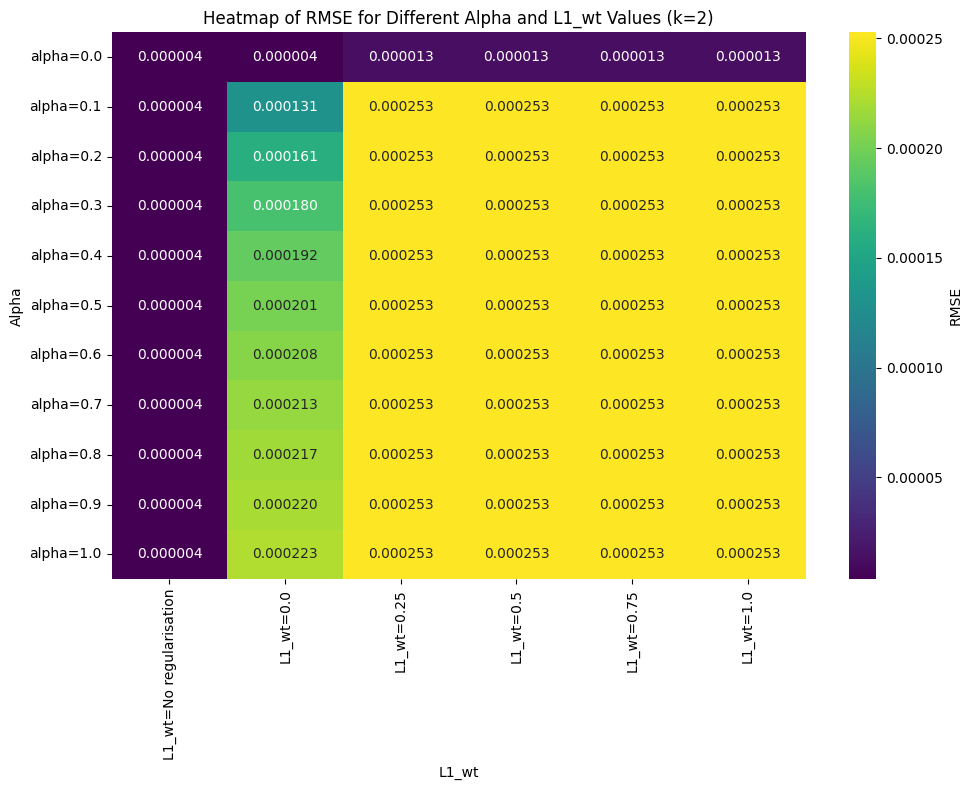

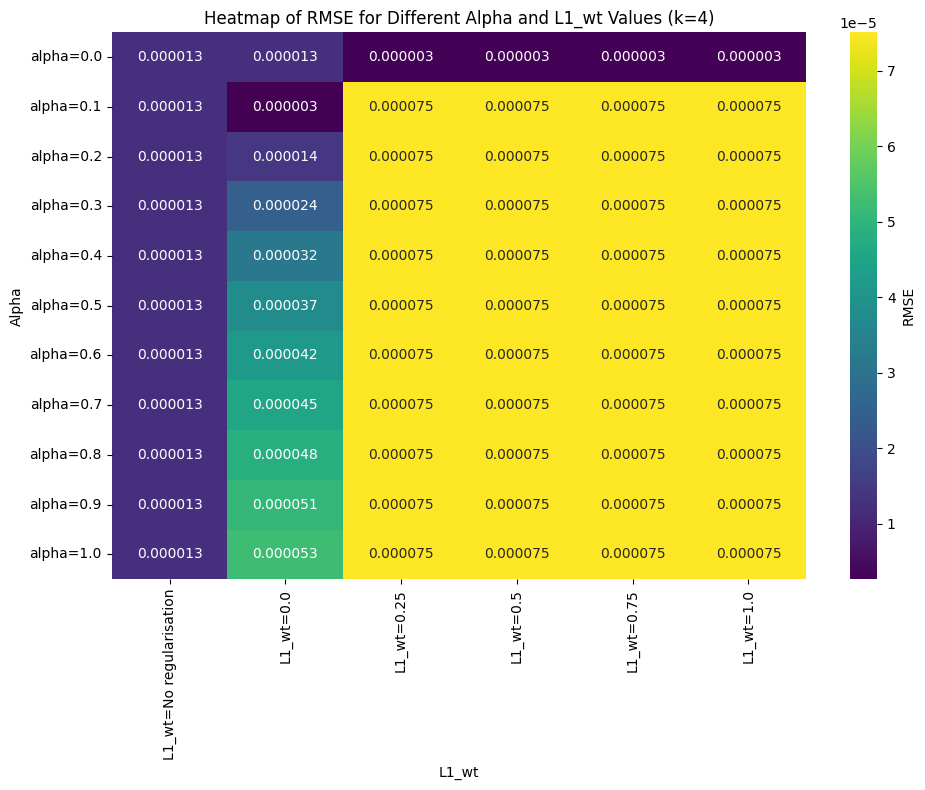

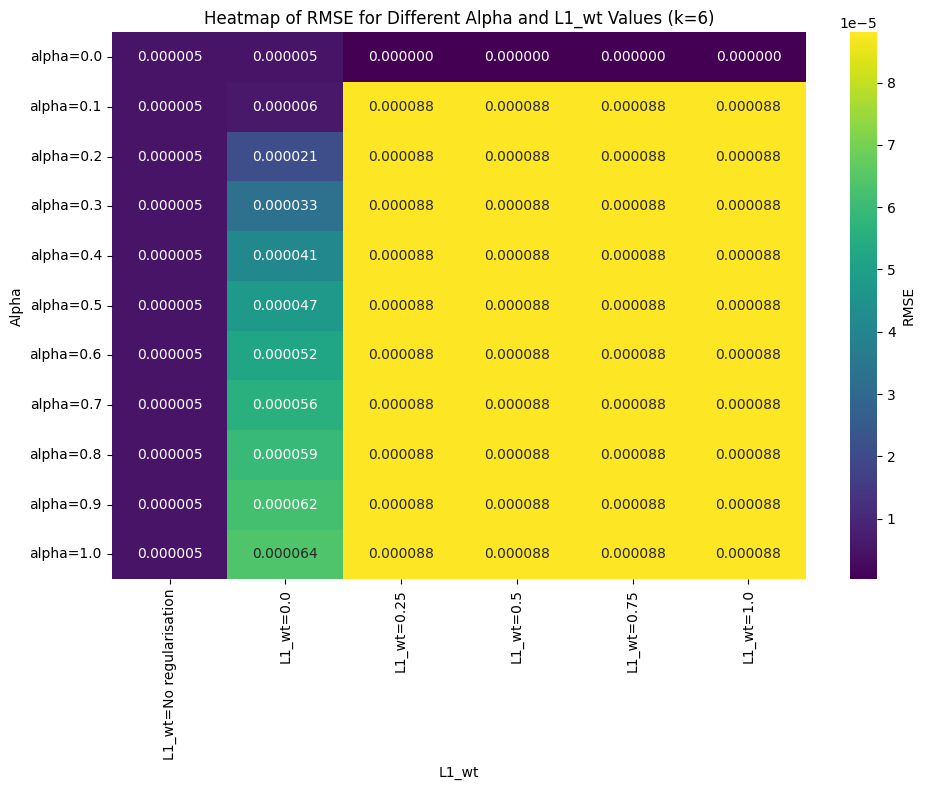

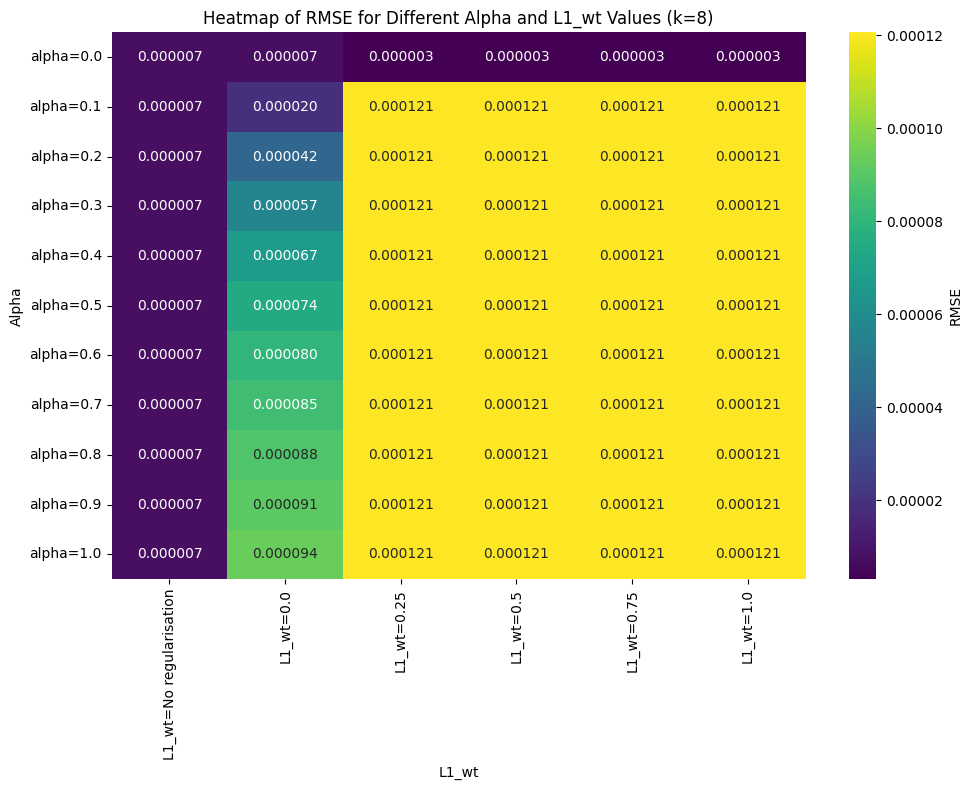

In [658]:
# Use this box for any code you need

for k in range(2, 10, 2):
    test_features, train_features, test_response, train_response = kfold(merged_df.iloc[:10,:], k)
    all_rmse = []

    alpha_values = np.arange(0.0, 1.1, 0.1)
    l1wt_values = np.arange(0.0, 1.25, 0.25)

    for alpha in alpha_values:
        rmse_list = [rmse(test_features, train_features, test_response, train_response)]
        for L1_wt in l1wt_values:
            rmse_list.append(rmse_regularised(test_features, train_features, test_response, train_response, alpha, L1_wt))
        all_rmse.append(rmse_list)
        
    l1wt_values = list(l1wt_values)
    l1wt_col = ["No regularisation"] + l1wt_values

    df_rmse = pd.DataFrame(all_rmse, columns=[f"L1_wt={l}" for l in l1wt_col], index=[f"alpha={a:.1f}" for a in alpha_values])
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_rmse, annot=True, fmt=".6f", cmap="viridis", cbar_kws={'label': 'RMSE'})
    plt.title(f"Heatmap of RMSE for Different Alpha and L1_wt Values (k={k})")
    plt.xlabel("L1_wt")
    plt.ylabel("Alpha")
    plt.tight_layout()
    plt.show()

It appears that however I choose $k$ to split the dataset, $\alpha$ = 0.0 gives me the best result, along with my original zero regularisation root mean square error. The next best result is when L1_wt = 0.0 (that is, pure L2 regularisation), and any mix of L1 regularisation appears to yield the same result, regardless of $\alpha$ (unless $\alpha$ = 0, in which case there was no regularisation in the first place). 

Interestingly, L2 is when we can see any observable change to root mean suare error by $\alpha$. As $\alpha$ increases from 0 to 1.0, the penalty increases, yet the root mean square error increases. This suggests that the penalty is too harsh, and a lower $\alpha$ will give us a better result.

## Prediction

### Exercise 8

Among the models created above, choose the one you believe performs *best*, and apply it to the entire dataset.

Fit a separate linear model for each of the age groups (0-99). Note down the model coefficients and plot them.



### Exercise 8

Write your answer to exercise 8 here

Our conclusion is that a non regularised fit is the best, and since $k$-fold cross-validation shows $k$ does not matter in the dataset and that nothing overfits, we shall just use linear regression as per normal. Perform this with the 9 feature vectors we used in Exercise 5, and find the coefficient for each age group.

In [668]:
merged_df[[20]]

,20
0,0.010649
1,0.013190
2,0.008483
3,0.008648
4,0.007580
...,...
326,0.007924
327,0.007188
328,0.009056
329,0.007234


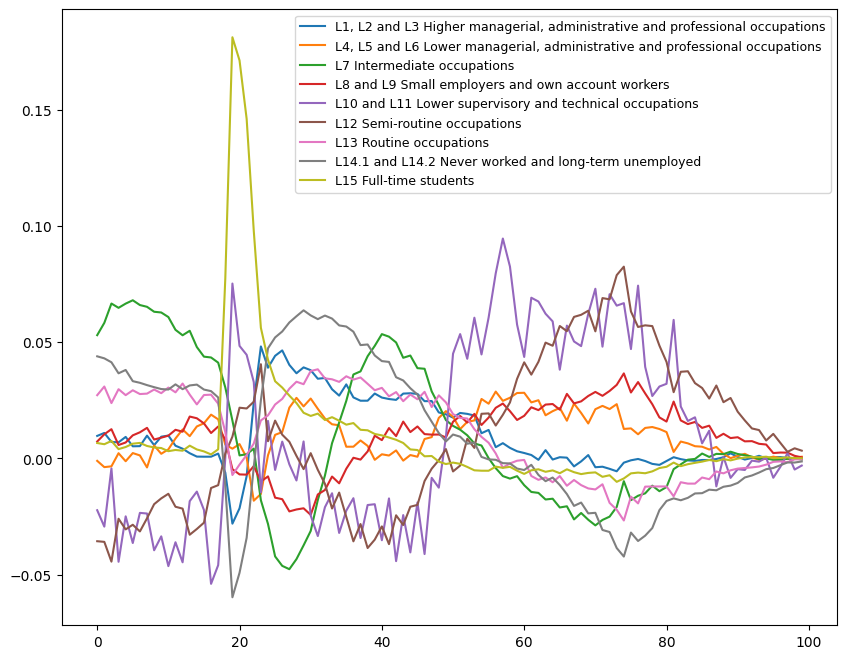

In [702]:
# Use this box for any code you need

coef = [[] for i in range(9)]
for j in range(100):
    response = merged_df[[j]]
    features = merged_df.iloc[:,104:] # 9 feature vectors
    design = np.concatenate([merged_df.iloc[:, i].values.reshape(-1, 1) for i in range(104, 113)], axis=1)
    m_linear_basis = sm.OLS(response.values.flatten(), design)
    results = m_linear_basis.fit()
    for i in range(9):
        coef[i] += [results.params[i]]
        
fig = plt.figure(figsize=(10,8))
coef_list = [feature.split(": ", 1)[1] for feature in features.columns.values]
for i in range(9):
    plt.plot(range(100), coef[i], label=coef_list[i])
plt.legend(fontsize=9)
plt.show()

### Exercise 9

Write a function that given a cities' NS-SEC breakdown, predicts it's age profile, and plot's it against the ground truth.

Play around with the method to find cities where your model works very well, but also ones where it works poorly.

### Exercise 9

Write your answer to exercise 9 here

In [819]:
while True:
    try:
        city = input("Enter City: ")
        if city not in list(student_df["geography"]):
            raise ValueError
        break
    except ValueError:
        print(f"Invalid input. Please enter valid city: ")

download_census_data("TS062")
student_df = load_census_data("TS062", level='ltla')

print("This is your city breakdown:")
breakdown = student_df[student_df["geography"] == city]
breakdown

Enter City: Cambridge
Files already exist at: census2021-ts062.
This is your city breakdown:


,date,geography,geography code,National Statistics Socio-economic Classification (NS-SEC): Total: All usual residents aged 16 years and over,"National Statistics Socio-economic Classification (NS-SEC): L1, L2 and L3 Higher managerial, administrative and professional occupations","National Statistics Socio-economic Classification (NS-SEC): L4, L5 and L6 Lower managerial, administrative and professional occupations",National Statistics Socio-economic Classification (NS-SEC): L7 Intermediate occupations,National Statistics Socio-economic Classification (NS-SEC): L8 and L9 Small employers and own account workers,National Statistics Socio-economic Classification (NS-SEC): L10 and L11 Lower supervisory and technical occupations,National Statistics Socio-economic Classification (NS-SEC): L12 Semi-routine occupations,National Statistics Socio-economic Classification (NS-SEC): L13 Routine occupations,National Statistics Socio-economic Classification (NS-SEC): L14.1 and L14.2 Never worked and long-term unemployed,National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students
59,2021,Cambridge,E07000008,124762,29074,21424,8507,7524,3805,7783,9146,5823,31676


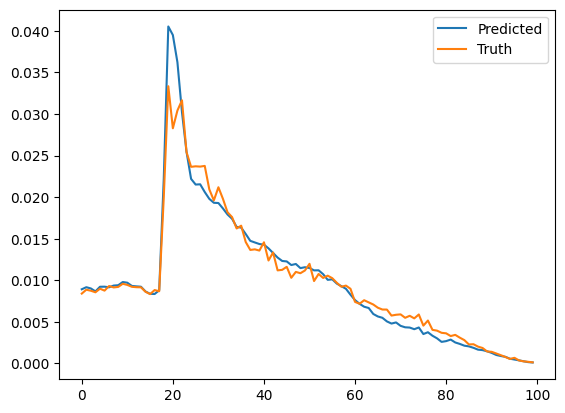

In [833]:
total = np.array(breakdown)[0][3]
raw_data = np.array(breakdown)[0][4:]/total 
pop = []
for i in range(100):
    response = merged_df[[i]]
    features = merged_df.iloc[:,104:] # 9 feature vectors
    design = np.concatenate([merged_df.iloc[:, i].values.reshape(-1, 1) for i in range(104, 113)], axis=1)
    m_linear_basis = sm.OLS(response.values.flatten(), design)
    results = m_linear_basis.fit()
    pop += [results.predict(raw_data)[0]]
plt.plot(range(100), pop, label="Predicted") #predicted demographics
plt.plot(range(100), np.array(merged_df[merged_df["geography"] == city].iloc[:,1:101])[0], label="Truth") #truth
plt.legend()

We can also use regularisation, setting `alpha` to 0.05 and `L1_wt` to 0.05.

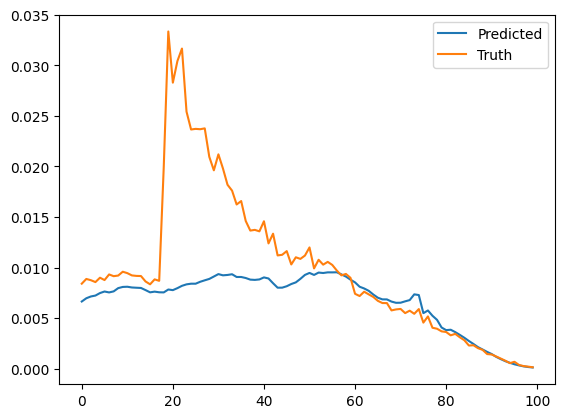

In [841]:
total = np.array(breakdown)[0][3]
raw_data = np.array(breakdown)[0][4:]/total 
pop = []
for i in range(100):
    response = merged_df[[i]]
    features = merged_df.iloc[:,104:] # 9 feature vectors
    design = np.concatenate([merged_df.iloc[:, i].values.reshape(-1, 1) for i in range(104, 113)], axis=1)
    m_linear_basis = sm.OLS(response.values.flatten(), design)
    results = m_linear_basis.fit_regularized(alpha=0.05, L1_wt=0)
    pop += [results.predict(raw_data)[0]]
plt.plot(range(100), pop, label="Predicted") #predicted demographics
plt.plot(range(100), np.array(merged_df[merged_df["geography"] == city].iloc[:,1:101])[0], label="Truth") #truth
plt.legend()

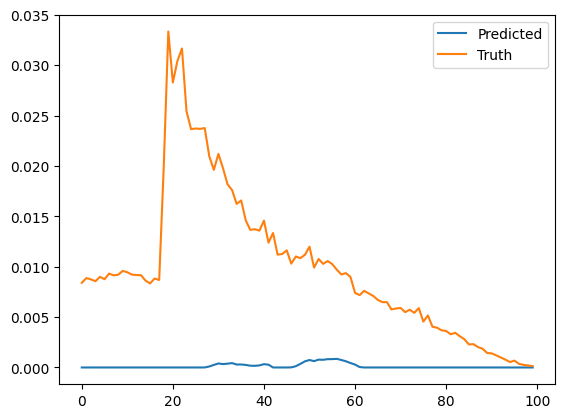

In [843]:
total = np.array(breakdown)[0][3]
raw_data = np.array(breakdown)[0][4:]/total 
pop = []
for i in range(100):
    response = merged_df[[i]]
    features = merged_df.iloc[:,104:] # 9 feature vectors
    design = np.concatenate([merged_df.iloc[:, i].values.reshape(-1, 1) for i in range(104, 113)], axis=1)
    m_linear_basis = sm.OLS(response.values.flatten(), design)
    results = m_linear_basis.fit_regularized(alpha=0.05, L1_wt=0.05)
    pop += [results.predict(raw_data)[0]]
plt.plot(range(100), pop, label="Predicted") #predicted demographics
plt.plot(range(100), np.array(merged_df[merged_df["geography"] == city].iloc[:,1:101])[0], label="Truth") #truth
plt.legend()

The predictions quickly become very poor even at low values of `L1_wt`. For my model, we can conclude that it best works without regularisation, and if needed, it should use L2 regularisation (as seen from an optimal `L1_wt` when it is low). 

# Conclusions

This has been quite a short introduction to a set of very useful models. We have cut quite a few corners theoretically but importantly this is something that we have to do when working as data-scientist. We need to be able to apply models while there is still some uncertainty in how they work and be able to translate this uncertainty to how we interpret the results that we get. You are by no means expected to be experts on GLMs at all but you should be able to use them.

The next part of your challenge is now to include the models that we have built up and use them in the coursework. Try to first visualise the data, make a clear narrative of why you are selecting a specific model and try to use the tools that we derived her in order to provide context to the predictions that you make. The statsmodel package gives you a rich set of tools that you should be able to include directly into your project. Importantly, remember that the most important thing is to be able to say why a model does what it does not necessarily choosing the right model.

During the lecture Neil mentioned the idea that what separates statisticians from machine learners is that the former cares about β while the machine learners cares about $\hat{y}$ (the predictions). If you look at the statmodels package this concept becomes very clear. Using the GLM code as we did in the first exercise doesn’t actually provide us with the uncertainty in the predictions only in the parameters. It was because of this we changed from the GLM model class to OLS when using the basis functions.

## References

- McCullagh, P., & Nelder, J. A. (1989). *Generalized Linear Models*. London, UK: Chapman Hall / CRC.

- Rasmussen, Carl Edward, & Williams, Christopher K. I. (2006). *Gaussian Processes for Machine Learning* (Adaptive Computation and Machine Learning). The MIT Press.

- Silverman, B. W. (1985). "Some Aspects of the Spline Smoothing Approach To Non-Parametric Regression Curve Fitting". *Journal of the Royal Statistical Society: Series B (Methodological)*, 47(1), pp. 1–21.

- Vapnik, Vladimir N. (1999). *The Nature of Statistical Learning Theory*.
